## 1. Install Required Packages
Run this cell to install all required dependencies.

In [1]:
# Install required packages
!pip install tensorflow>=2.10.0
!pip install ultralytics>=8.0.0
!pip install opencv-python>=4.7.0
!pip install matplotlib>=3.6.0
!pip install seaborn>=0.12.0
!pip install scikit-learn>=1.2.0
!pip install pyyaml>=6.0
!pip install tqdm>=4.64.0
!pip install gdown>=4.6.0
!pip install Pillow>=9.0.0


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## 2. Import Libraries & Verify Installation

In [2]:
# Core imports
import os
import sys
from pathlib import Path

# Set project root
PROJECT_ROOT = Path(r"c:/Users/anike/Downloads/WasteSegregation")
sys.path.insert(0, str(PROJECT_ROOT))

print(f"Project Root: {PROJECT_ROOT}")
print(f"Python Version: {sys.version}")

Project Root: c:\Users\anike\Downloads\WasteSegregation
Python Version: 3.13.5 (tags/v3.13.5:6cb20a2, Jun 11 2025, 16:15:46) [MSC v.1943 64 bit (AMD64)]


In [3]:
# Import and verify TensorFlow
import tensorflow as tf
print(f"✅ TensorFlow Version: {tf.__version__}")

# Check GPU availability
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"✅ GPU Available: {len(gpus)} GPU(s) detected")
    for gpu in gpus:
        print(f"   - {gpu.name}")
else:
    print("⚠️ No GPU detected. Training will use CPU (slower).")

✅ TensorFlow Version: 2.20.0
⚠️ No GPU detected. Training will use CPU (slower).


In [4]:
# Import and verify YOLO (ultralytics)
from ultralytics import YOLO
import ultralytics
print(f"✅ Ultralytics (YOLO) Version: {ultralytics.__version__}")

Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\anike\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✅ Ultralytics (YOLO) Version: 8.4.7


In [5]:
# Import and verify OpenCV
import cv2
print(f"✅ OpenCV Version: {cv2.__version__}")

✅ OpenCV Version: 4.13.0


In [6]:
# Import other essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import yaml
from tqdm import tqdm
from PIL import Image

print(f"✅ NumPy Version: {np.__version__}")
print(f"✅ Pandas Version: {pd.__version__}")
print(f"✅ Matplotlib Version: {plt.matplotlib.__version__}")
print(f"✅ Seaborn Version: {sns.__version__}")
print(f"✅ Scikit-learn imported successfully")
print(f"✅ PyYAML imported successfully")
print(f"✅ tqdm imported successfully")
print(f"✅ Pillow imported successfully")

✅ NumPy Version: 2.4.1
✅ Pandas Version: 3.0.0
✅ Matplotlib Version: 3.10.8
✅ Seaborn Version: 0.13.2
✅ Scikit-learn imported successfully
✅ PyYAML imported successfully
✅ tqdm imported successfully
✅ Pillow imported successfully


## 3. Verify Project Directory Structure

In [7]:
# Define expected directories
expected_dirs = [
    "datasets/raw/trashnet",
    "datasets/raw/taco",
    "datasets/processed/train/images",
    "datasets/processed/train/labels",
    "datasets/processed/val/images",
    "datasets/processed/val/labels",
    "datasets/processed/test/images",
    "datasets/processed/test/labels",
    "models/yolo",
    "models/mobilenet",
    "models/autoencoder",
    "outputs/detections",
    "outputs/classifications",
    "outputs/metrics",
    "notebooks",
    "src/utils",
    "config"
]

print("📁 Verifying Directory Structure:\n")
all_exist = True

for dir_path in expected_dirs:
    full_path = PROJECT_ROOT / dir_path
    if full_path.exists():
        print(f"✅ {dir_path}")
    else:
        print(f"❌ {dir_path} - MISSING")
        all_exist = False

if all_exist:
    print("\n✅ All directories verified successfully!")
else:
    print("\n⚠️ Some directories are missing. Run the cell below to create them.")

📁 Verifying Directory Structure:

✅ datasets/raw/trashnet
✅ datasets/raw/taco
✅ datasets/processed/train/images
✅ datasets/processed/train/labels
✅ datasets/processed/val/images
✅ datasets/processed/val/labels
✅ datasets/processed/test/images
✅ datasets/processed/test/labels
✅ models/yolo
✅ models/mobilenet
✅ models/autoencoder
✅ outputs/detections
✅ outputs/classifications
✅ outputs/metrics
✅ notebooks
✅ src/utils
✅ config

✅ All directories verified successfully!


In [8]:
# Create any missing directories
for dir_path in expected_dirs:
    full_path = PROJECT_ROOT / dir_path
    full_path.mkdir(parents=True, exist_ok=True)

print("✅ All directories created/verified!")

✅ All directories created/verified!


## 4. Load and Verify Configuration

In [9]:
# Load configuration file
config_path = PROJECT_ROOT / "config" / "config.yaml"

with open(config_path, 'r') as f:
    config = yaml.safe_load(f)

print("📋 Configuration Loaded Successfully!\n")
print("=" * 50)
print("KEY SETTINGS:")
print("=" * 50)
print(f"\n🖼️ Image Sizes:")
print(f"   - MobileNet Input: {config['dataset']['image_size']}x{config['dataset']['image_size']}")
print(f"   - YOLO Input: {config['dataset']['yolo_image_size']}x{config['dataset']['yolo_image_size']}")

print(f"\n📊 Data Split:")
print(f"   - Train: {config['dataset']['train_split']*100}%")
print(f"   - Validation: {config['dataset']['val_split']*100}%")
print(f"   - Test: {config['dataset']['test_split']*100}%")

print(f"\n🏷️ Waste Categories:")
for cat in config['categories']['classification']:
    print(f"   - {cat}")

print(f"\n⚙️ YOLO Settings:")
print(f"   - Model: {config['yolo']['model']}")
print(f"   - Epochs: {config['yolo']['epochs']}")
print(f"   - Batch Size: {config['yolo']['batch_size']}")

print(f"\n⚙️ MobileNet Settings:")
print(f"   - Base Model: {config['mobilenet']['base_model']}")
print(f"   - Epochs: {config['mobilenet']['epochs']}")
print(f"   - Learning Rate: {config['mobilenet']['learning_rate']}")

print(f"\n⚙️ Autoencoder Settings:")
print(f"   - Encoding Dim: {config['autoencoder']['encoding_dim']}")
print(f"   - Anomaly Threshold: {config['autoencoder']['anomaly_threshold']}")

📋 Configuration Loaded Successfully!

KEY SETTINGS:

🖼️ Image Sizes:
   - MobileNet Input: 224x224
   - YOLO Input: 640x640

📊 Data Split:
   - Train: 70.0%
   - Validation: 15.0%
   - Test: 15.0%

🏷️ Waste Categories:
   - recyclable
   - organic
   - e-waste
   - general

⚙️ YOLO Settings:
   - Model: yolov8n.pt
   - Epochs: 100
   - Batch Size: 16

⚙️ MobileNet Settings:
   - Base Model: MobileNetV2
   - Epochs: 50
   - Learning Rate: 0.001

⚙️ Autoencoder Settings:
   - Encoding Dim: 64
   - Anomaly Threshold: 0.02


## 5. Test Basic Model Loading

In [10]:
# Test YOLO model loading (pretrained)
print("Testing YOLO model loading...")
try:
    yolo_model = YOLO('yolov8n.pt')  # Nano model for quick test
    print("✅ YOLO model loaded successfully!")
    del yolo_model  # Free memory
except Exception as e:
    print(f"❌ YOLO loading failed: {e}")

Testing YOLO model loading...
✅ YOLO model loaded successfully!


In [11]:
# Test MobileNetV2 loading
print("Testing MobileNetV2 model loading...")
try:
    from tensorflow.keras.applications import MobileNetV2
    
    base_model = MobileNetV2(
        input_shape=(224, 224, 3),
        include_top=False,
        weights='imagenet'
    )
    print(f"✅ MobileNetV2 loaded successfully!")
    print(f"   - Total layers: {len(base_model.layers)}")
    print(f"   - Total parameters: {base_model.count_params():,}")
    del base_model  # Free memory
except Exception as e:
    print(f"❌ MobileNetV2 loading failed: {e}")

Testing MobileNetV2 model loading...
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 6s 1us/step
✅ MobileNetV2 loaded successfully!
   - Total layers: 154
   - Total parameters: 2,257,984


In [12]:
# Test Autoencoder architecture creation
print("Testing Autoencoder architecture...")
try:
    from tensorflow.keras.models import Model
    from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
    
    # Simple autoencoder for testing
    input_img = Input(shape=(128, 128, 3))
    
    # Encoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)
    
    # Decoder
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
    
    autoencoder = Model(input_img, decoded)
    
    print(f"✅ Autoencoder architecture created successfully!")
    print(f"   - Total parameters: {autoencoder.count_params():,}")
    del autoencoder  # Free memory
except Exception as e:
    print(f"❌ Autoencoder creation failed: {e}")

Testing Autoencoder architecture...
✅ Autoencoder architecture created successfully!
   - Total parameters: 13,347


## 6. Test Image Processing Pipeline

In [13]:
# Create a test image and verify image processing
print("Testing image processing pipeline...\n")

# Create a dummy test image
test_image = np.random.randint(0, 255, (480, 640, 3), dtype=np.uint8)

# Test resizing for MobileNet
mobilenet_size = config['dataset']['image_size']
resized_mobilenet = cv2.resize(test_image, (mobilenet_size, mobilenet_size))
print(f"✅ Resize for MobileNet: {test_image.shape} → {resized_mobilenet.shape}")

# Test resizing for YOLO
yolo_size = config['dataset']['yolo_image_size']
resized_yolo = cv2.resize(test_image, (yolo_size, yolo_size))
print(f"✅ Resize for YOLO: {test_image.shape} → {resized_yolo.shape}")

# Test normalization
normalized = resized_mobilenet.astype(np.float32) / 255.0
print(f"✅ Normalization: pixel range [{normalized.min():.2f}, {normalized.max():.2f}]")

# Test color conversion
rgb_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
print(f"✅ BGR to RGB conversion successful")

# Test data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=config['augmentation']['rotation_range'],
    width_shift_range=config['augmentation']['width_shift_range'],
    height_shift_range=config['augmentation']['height_shift_range'],
    horizontal_flip=config['augmentation']['horizontal_flip'],
    zoom_range=config['augmentation']['zoom_range'],
    fill_mode=config['augmentation']['fill_mode']
)
print(f"✅ Data augmentation generator configured")

Testing image processing pipeline...

✅ Resize for MobileNet: (480, 640, 3) → (224, 224, 3)
✅ Resize for YOLO: (480, 640, 3) → (640, 640, 3)
✅ Normalization: pixel range [0.00, 0.99]
✅ BGR to RGB conversion successful
✅ Data augmentation generator configured


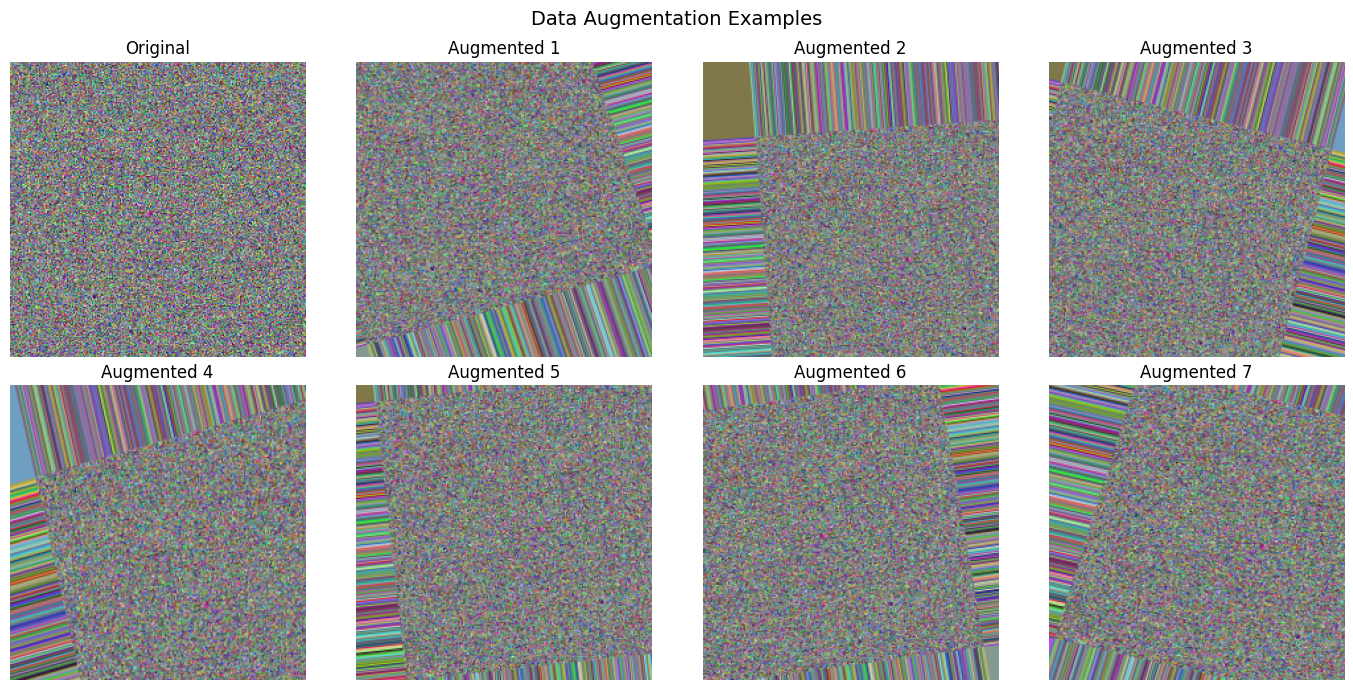

✅ Image augmentation visualization complete!


In [14]:
# Visualize augmentation on test image
fig, axes = plt.subplots(2, 4, figsize=(14, 7))

# Original
axes[0, 0].imshow(resized_mobilenet)
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')

# Generate augmented versions
test_batch = np.expand_dims(resized_mobilenet, 0)
aug_iter = datagen.flow(test_batch, batch_size=1)

for i, ax in enumerate(axes.flatten()[1:]):
    aug_image = next(aug_iter)[0].astype(np.uint8)
    ax.imshow(aug_image)
    ax.set_title(f'Augmented {i+1}')
    ax.axis('off')

plt.suptitle('Data Augmentation Examples', fontsize=14)
plt.tight_layout()
plt.show()

print("✅ Image augmentation visualization complete!")

## 7. System Summary

In [15]:
# Print final summary
print("=" * 60)
print("🎉 PHASE 1 COMPLETE: ENVIRONMENT SETUP & VERIFICATION")
print("=" * 60)

print("\n📦 INSTALLED PACKAGES:")
print(f"   • TensorFlow {tf.__version__}")
print(f"   • Ultralytics (YOLO) {ultralytics.__version__}")
print(f"   • OpenCV {cv2.__version__}")
print(f"   • NumPy {np.__version__}")
print(f"   • Pandas {pd.__version__}")
print(f"   • Matplotlib {plt.matplotlib.__version__}")

print("\n📁 PROJECT STRUCTURE:")
print(f"   • Root: {PROJECT_ROOT}")
print(f"   • Datasets: datasets/raw/, datasets/processed/")
print(f"   • Models: models/yolo/, models/mobilenet/, models/autoencoder/")
print(f"   • Outputs: outputs/detections/, outputs/classifications/, outputs/metrics/")

print("\n🤖 MODELS VERIFIED:")
print("   • YOLO v8 (Object Detection)")
print("   • MobileNetV2 (Classification)")
print("   • Convolutional Autoencoder (Anomaly Detection)")

print("\n✅ NEXT STEPS:")
print("   1. Phase 2: Download and prepare datasets (TrashNet & TACO)")
print("   2. Phase 3: Train YOLO object detection model")
print("   3. Phase 4: Train MobileNet classification model")
print("   4. Phase 5: Train Autoencoder for anomaly detection")
print("   5. Phase 6: Integrate all models into pipeline")

print("\n" + "=" * 60)

🎉 PHASE 1 COMPLETE: ENVIRONMENT SETUP & VERIFICATION

📦 INSTALLED PACKAGES:
   • TensorFlow 2.20.0
   • Ultralytics (YOLO) 8.4.7
   • OpenCV 4.13.0
   • NumPy 2.4.1
   • Pandas 3.0.0
   • Matplotlib 3.10.8

📁 PROJECT STRUCTURE:
   • Root: c:\Users\anike\Downloads\WasteSegregation
   • Datasets: datasets/raw/, datasets/processed/
   • Models: models/yolo/, models/mobilenet/, models/autoencoder/
   • Outputs: outputs/detections/, outputs/classifications/, outputs/metrics/

🤖 MODELS VERIFIED:
   • YOLO v8 (Object Detection)
   • MobileNetV2 (Classification)
   • Convolutional Autoencoder (Anomaly Detection)

✅ NEXT STEPS:
   1. Phase 2: Download and prepare datasets (TrashNet & TACO)
   2. Phase 3: Train YOLO object detection model
   3. Phase 4: Train MobileNet classification model
   4. Phase 5: Train Autoencoder for anomaly detection
   5. Phase 6: Integrate all models into pipeline

